## Michaelis-Menten Kinetics

Reactions involving an enzyme (E) typically proceed as follows,

$$ E + S \longleftrightarrow ES \longrightarrow E + P $$

in which the substrate (S) must first bind to the enzyme's active site in order to catalytically generate the product (P). We will call the rate constant of the first forward step $k_f$, the rate constant of the first reverse step $k_r$, and the rate constant of the second step $k_{cat}$.

The rate equations that predict how the substrate, enzyme, intermediate, and product concentrations change with time are as follows:

$$ \frac{d[S]}{dt} = - k_f [E][S] + k_r [ES] $$

$$ \frac{d[E]}{dt} = - k_f [E][S] + k_r [ES] + k_{cat} [ES] $$

$$ \frac{d[ES]}{dt} = k_f [E][S] - k_r [ES] - k_{cat} [ES] $$

$$ \frac{d[P]}{dt} = k_{cat} [ES] $$

If the initial concentrations are $[E]=[E]_0$, $[S]=[S]_0$, $[ES]=0$, and $[P]=0$, then the changes in concentration after the first step at some time, t, are:

$$ \Delta[S]_1 = -k_f [E]_0 [S]_0 \Delta t $$

$$ \Delta[E]_1 = -k_f [E]_0 [S]_0 \Delta t $$

$$ \Delta[ES]_1 = k_f [E]_0 [S]_0 \Delta t $$

$$ \Delta[P]_1 = 0 $$

After the second step, the changes in concentration are:

$$ \Delta[S]_2 = -k_f [E]_1 [S]_1 \Delta t + k_r [ES]_1 \Delta t $$

$$ \Delta[E]_2 = -k_f [E]_1 [S]_1 \Delta t + k_r [ES]_1 \Delta t + k_{cat} [ES]_1 \Delta t $$

$$ \Delta[ES]_2 = k_f [E]_1 [S]_1 \Delta t - k_r [ES]_1 \Delta t - k_{cat} [ES]_1 \Delta t $$

$$ \Delta[P]_2 = k_{cat} [ES]_1 \Delta t $$

And the final concentrations of each of the species are:

$$ [E]_t = [E]_0 + \Delta [E]_t$$

$$ [S]_t = [S]_0 + \Delta [S]_t $$

$$ [ES]_t = [ES]_0 + \Delta [ES]_t $$

$$ [P]_t = [P]_0 + \Delta [P]_t $$



## Numerically Integrating the Michaelis-Menten Rate Expressions Using an ODE Solver 

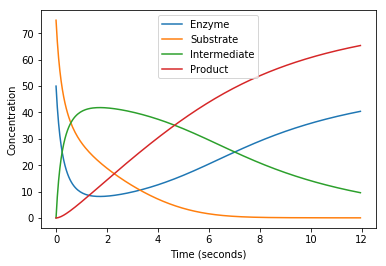

In [37]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline


def rxn(C,t):
    kf = 0.05
    kr = 0.005
    kcat = 0.2
    dEdt = -kf*C[0]*C[1] + kr*C[2] + kcat*C[2]
    dSdt = -kf*C[0]*C[1] + kr*C[2]
    dESdt = kf*C[0]*C[1] - kr*C[2] - kcat*C[2]
    dPdt = kcat*C[2]
    return [dEdt,dSdt,dESdt,dPdt]

#initial concentrations or "initial conditions"
E0 = 50
S0 = 75
ES0 = 0
P0 = 0
C0 = [E0,S0,ES0,P0]

t = np.arange(0,12,0.05)#seconds
#print(t)

Conc = odeint(rxn,C0,t)
cE = Conc[:,0]
cS = Conc[:,1]
cES = Conc[:,2]
cP = Conc[:,3]
#print(cE)
#print(cS)
#print(cES)
#print(cP)


plt.plot(t,Conc[:,0])
plt.plot(t,Conc[:,1])
plt.plot(t,Conc[:,2])
plt.plot(t,Conc[:,3])
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration')
plt.legend(['Enzyme','Substrate','Intermediate','Product'])
plt.show()

***Change the values of the rate constants ($k_f$, $k_r$, and $k_{cat}$) and the initial concentrations to see how the plot above changes.***

## Competitive Inhibition

In the case where there is competition for binding to the enzyme active site, competitive inhibition can alter the reaction kinetics. Consider the following equilibrium in which I represents an inhibitor of the substrate, S:

$$ EI + S_t \longleftrightarrow E + S_t + I \longleftrightarrow ES_t + I \longrightarrow E + P + I $$

The substrate and inhibitor can both reversibly bind to the enzyme active site. For the first step, we will call the forward rate constant $k_{-2}$ and the reverse rate constant $k_2$. For the second step, we will call the forward rate constant $k_1$ and the reverse rate constant $k_{-1}$. The rate constant of the third step is $k_{cat}$.

The rate equations that predict how the substrate, enzyme, inhibitor, enzyme-substrate, enzyme-inhibitor, and product concentrations change with time are as follows:

$$ \frac{d[S]}{dt} = - k_1 [E][S] + k_{-1} [ES] $$

$$ \frac{d[I]}{dt} = - k_{-2} [E][I] + k_2 [EI] $$

$$ \frac{d[E]}{dt} = - k_{-2} [E][I] - k_1 [E][S] + k_2[EI] + k_{-1}[ES] + k_{cat} [ES] $$

$$ \frac{d[ES]}{dt} = k_1 [E][S] - k_{-1} [ES] - k_{cat} [ES] $$

$$ \frac{d[EI]}{dt} = k_2 [E][I] - k_{-2} [EI] $$

$$ \frac{d[P]}{dt} = k_{cat} [ES] $$

If the initial concentrations are $[E]=[E]_0$, $[S]=[S]_0$, $[I]=[I]_0$, $[ES]=0$, $[EI]=0$, and $[P]=0$, then the changes in concentration after the first step at some time, t, are:

$$ \Delta[S] = -k_1[E]_0[S]_0 \Delta t $$

$$ \Delta[I] = -k_{-2}[E]_0[I]_0 \Delta t $$

$$ \Delta[E] = -k_{-2}[E]_0[I]_0 \Delta t - k_1[E]_0[S]_0 \Delta t $$

$$ \Delta[ES] = k_1 [E]_0 [S]_0 \Delta t $$

$$ \Delta[EI] = k_2 [E]_0 [I]_0 \Delta t $$

$$ \Delta[P] = 0 $$

and subsequent steps yield the following concentration changes:

$$ \Delta[S] = -k_1[E][S]\Delta t + k_{-1}[ES]\Delta t $$

$$ \Delta[I] = -k_{-2}[E][I]\Delta t + k_{2}[EI]\Delta t $$

$$ \Delta[E] = -k_{-2}[E][I]\Delta t - k_1[E][S]\Delta t + k_2[EI]\Delta t + k_{-1}[ES]\Delta t + k_{cat}[ES]\Delta t $$

$$ \Delta[ES] = k_1[E][S]\Delta t - k_{-1}[ES]\Delta t - k_{cat}[ES]\Delta t $$

$$ \Delta[EI] = k_2[E][I]\Delta t - k_{-2}[EI]\Delta t $$

$$ \Delta[P] = k_{cat}[ES]\Delta t $$

Competitive inhibition also occurs when a neurotransmitter or a drug binds to a receptor to stimulate some kind of response. Generically, this equilibrium looks like:

$$ RI + N_t \longleftrightarrow R + N_t + I \longleftrightarrow RN_t + I \longrightarrow Response $$

## Numerically Integrating the Competitive Inhibition Rate Expressions Using an ODE Solver 

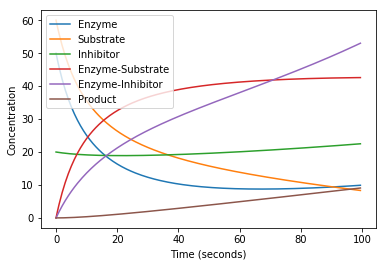

In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def rxn(C,t):
    k1f = 0.0015
    k1r = 0.0002
    k2f = 0.002
    k2r = 0.00015
    kcat = 0.0025
    dEdt = -1*k2r*C[0]*C[2] - k1f*C[0]*C[1] + k1r*C[3] + k2f*C[4] + kcat*C[3]
    dSdt = -1*k1f*C[0]*C[1] + k1r*C[3]
    dIdt = -1*k2r*C[0]*C[2] + k2f*C[4]
    dESdt = k1f*C[0]*C[1] - k1r*C[3] - kcat*C[3]
    dEIdt = k2f*C[0]*C[2] - k2r*C[4]
    dPdt = kcat*C[3]
    return [dEdt,dSdt,dIdt,dESdt,dEIdt,dPdt]

#initial concentrations or "initial conditions"
E0 = 50
S0 = 60
I0 = 20
ES0 = 0
EI0 = 0
P0 = 0
C0 = [E0,S0,I0,ES0,EI0,P0]

t = np.arange(0,100,0.5)#seconds
#print(t)

Conc = odeint(rxn,C0,t)
cE = Conc[:,0]
cS = Conc[:,1]
cI = Conc[:,2]
cES = Conc[:,3] 
cEI = Conc[:,4]
cP = Conc[:,5]
#print(Conc)

plt.plot(t,Conc[:,0])
plt.plot(t,Conc[:,1])
plt.plot(t,Conc[:,2])
plt.plot(t,Conc[:,3])
plt.plot(t,Conc[:,4])
plt.plot(t,Conc[:,5])
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration')
plt.legend(['Enzyme','Substrate','Inhibitor','Enzyme-Substrate','Enzyme-Inhibitor','Product'])
plt.show()

***Change the values of the rate constants and the initial concentrations to see how the plot above changes.***

## Task

Lets look at the enzymatic activity of fumarase. Fumarase is a tetrameric enzyme that catalyzes the conversion of fumarate to malate (shown below).

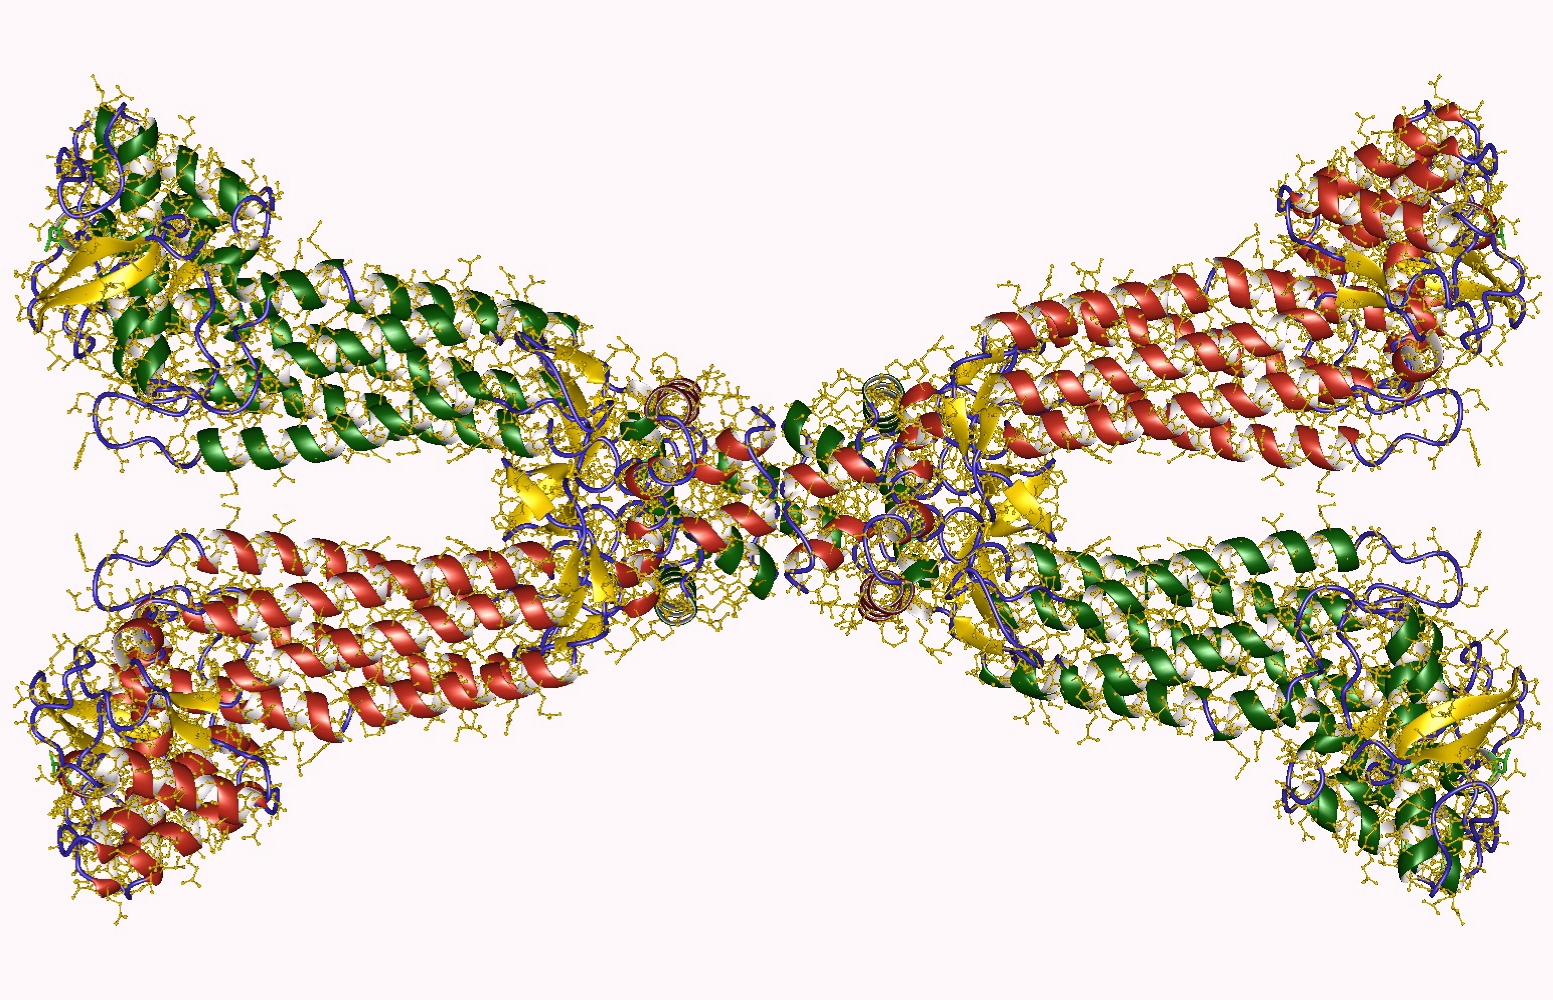

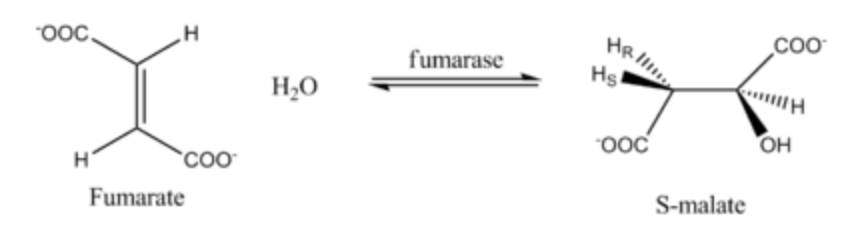

Fumerase will also bind to the non-natural substrate, chlorofumarate. Conveniently, chlorofumarate absorbs strongly in the UV, but the reaction product does not, giving a spectroscopic signal you can observe experimentally to follow reaction progress.

Using the following data, plot the concentration changes over time for the above reaction (without chlorofumerate present and in the presence of chlorofumarate).

In [2]:
E0 = 20
S0 = 60
I0 = 10
k1f = 0.0020
k1r = 0.0008
k2f = 0.0010
k2r = 0.0003
kcat = 0.03    